# AdaDelta Implementation
Implementing the adaDelta update rule as described in AdaDelta: An adaptive learning rate method (Matthew D. Zeiler, Google, 2012)

The code can be found in convolutional_mlp.py in lines 349-389

... loading data
... building the model
... training
training @ iter =  0
epoch 1, minibatch 100/100, validation error 9.230000 %
     epoch 1, minibatch 100/100, test error of best model 9.520000 %
training @ iter =  100
epoch 2, minibatch 100/100, validation error 6.180000 %
     epoch 2, minibatch 100/100, test error of best model 6.500000 %
training @ iter =  200
epoch 3, minibatch 100/100, validation error 4.640000 %
     epoch 3, minibatch 100/100, test error of best model 4.850000 %
training @ iter =  300
epoch 4, minibatch 100/100, validation error 3.500000 %
     epoch 4, minibatch 100/100, test error of best model 3.910000 %
training @ iter =  400
epoch 5, minibatch 100/100, validation error 3.020000 %
     epoch 5, minibatch 100/100, test error of best model 3.260000 %
training @ iter =  500
epoch 6, minibatch 100/100, validation error 2.780000 %
     epoch 6, minibatch 100/100, test error of best model 2.800000 %
training @ iter =  600
epoch 7, minibatch 100/100, validation

The code for file convolutional_mlp_class2.pyc ran for 344.48m
The code for file convolutional_mlp_class2.pyc ran for 175.58m


Best validation score of 0.940000 % obtained at iteration 4600, with test performance 0.950000 %


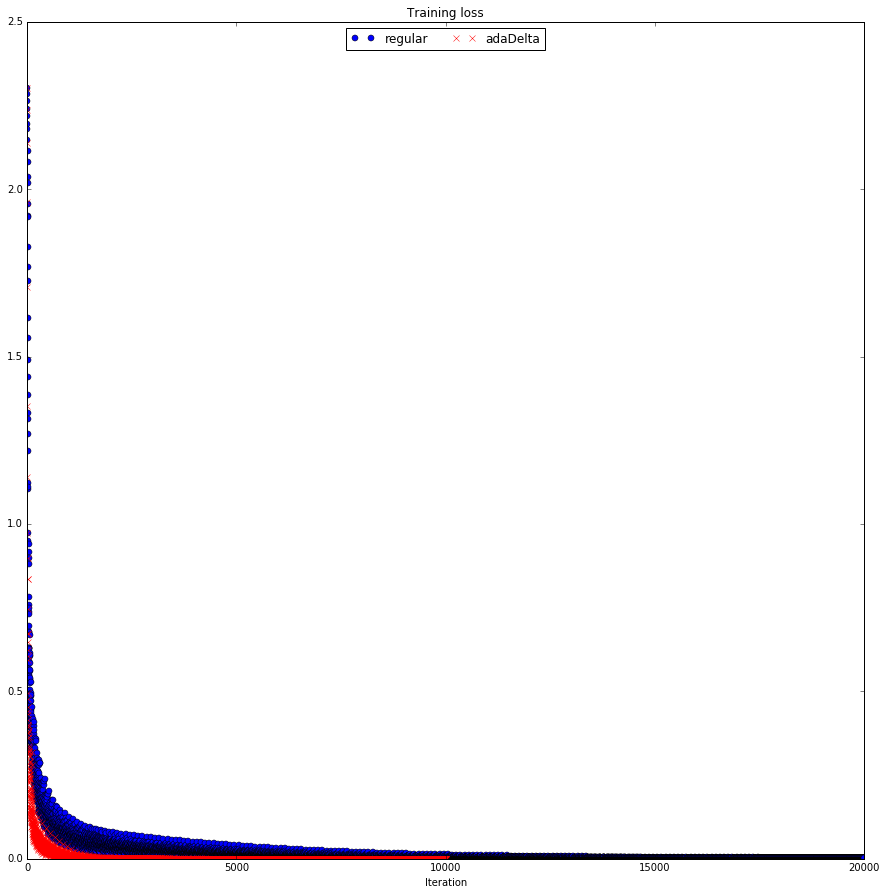

In [88]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import convolutional_mlp as conv
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.title('Training loss')
plt.xlabel('Iteration')

lenet5 = conv.lenet5(update_rule='regular')
lenet5.train(n_epochs=200)
plt.plot(lenet5.loss_history,'bo',label='regular')

lenet5 = conv.lenet5(update_rule='adaDelta')
lenet5.train(n_epochs=200)
plt.plot(lenet5.loss_history, 'rx', label='adaDelta')

plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show() 


**Conclusion:** the final validation and test error after 200 iterations don't vary much, but adaDelta shows faster convergence.

# Dropout implementation
Dropout was introduced in Dropout: A Simple Way to Prevent Neural Networks from Overfitting (Nitish Srivastava;
Geoffrey Hinton; Alex Krizhevsky; Ilya Sutskever; Ruslan Salakhutdinov, 2014) and aims to reduce overfitting
by randomly dropping out a certain portion of the hidden units.

The implementation can be found in convolutional_mlp.py mostly on lines 497-511

In [135]:
lenet5 = conv.lenet5(update_rule='adaDelta')
lenet5.train(n_epochs=100)


... loading data
... building the model
... training
training @ iter =  0
epoch 1, minibatch 100/100, training error 3.858000 %, validation error 3.360000 %
     epoch 1, minibatch 100/100, test error of best model 3.590000 %
training @ iter =  100
epoch 2, minibatch 100/100, training error 2.366000 %, validation error 2.200000 %
     epoch 2, minibatch 100/100, test error of best model 2.290000 %
training @ iter =  200
epoch 3, minibatch 100/100, training error 1.620000 %, validation error 1.870000 %
     epoch 3, minibatch 100/100, test error of best model 1.690000 %
training @ iter =  300
epoch 4, minibatch 100/100, training error 1.104000 %, validation error 1.560000 %
     epoch 4, minibatch 100/100, test error of best model 1.340000 %
training @ iter =  400
epoch 5, minibatch 100/100, training error 0.804000 %, validation error 1.340000 %
     epoch 5, minibatch 100/100, test error of best model 1.260000 %
training @ iter =  500
epoch 6, minibatch 100/100, training error 0.604000

The code for file convolutional_mlp.pyc ran for 235.16m


In [136]:
import convolutional_mlp as conv
lenet5dropout = conv.lenet5(update_rule='adaDelta', dropout=0.5)
lenet5dropout.train(n_epochs=100)


... loading data
... building the model
... training
training @ iter =  0
epoch 1, minibatch 100/100, training error 4.296000 %, validation error 3.670000 %
     epoch 1, minibatch 100/100, test error of best model 3.840000 %
training @ iter =  100
epoch 2, minibatch 100/100, training error 2.582000 %, validation error 2.400000 %
     epoch 2, minibatch 100/100, test error of best model 2.470000 %
training @ iter =  200
epoch 3, minibatch 100/100, training error 2.016000 %, validation error 1.950000 %
     epoch 3, minibatch 100/100, test error of best model 1.930000 %
training @ iter =  300
epoch 4, minibatch 100/100, training error 1.686000 %, validation error 1.740000 %
     epoch 4, minibatch 100/100, test error of best model 1.690000 %
training @ iter =  400
epoch 5, minibatch 100/100, training error 1.542000 %, validation error 1.630000 %
     epoch 5, minibatch 100/100, test error of best model 1.590000 %
training @ iter =  500
epoch 6, minibatch 100/100, training error 1.288000

The code for file convolutional_mlp.pyc ran for 241.70m


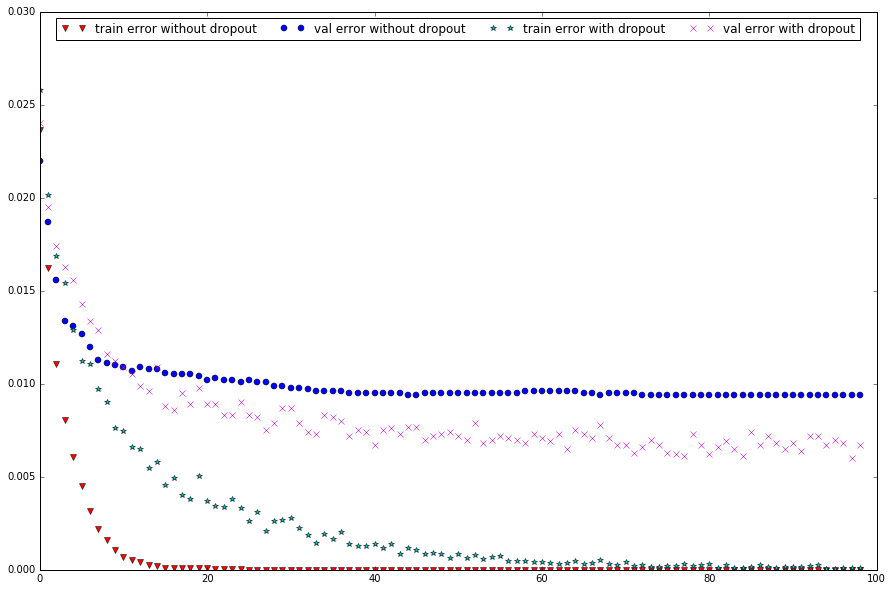

In [163]:
plt.plot(lenet5.train_error_history[1:], 'rv', label='train error without dropout')
plt.plot(lenet5.val_error_history[1:], 'bo', label='val error without dropout')


plt.plot(lenet5dropout.train_error_history[1:], 'c*', label='train error with dropout')
plt.plot(lenet5dropout.val_error_history[1:], 'mx', label='val error with dropout')

plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 10)
plt.show() 


**conclusion**: as you can see in the graph the network with dropout performs slightly better on the validation data and worse on the training data, this indicates that there is less overfitting and a better generalized model.

# PreLU implementation

In [138]:
lenet5tanh = lenet5dropout

In [139]:
lenet5prelu = conv.lenet5(update_rule='adaDelta', dropout=0.5, activation='PreLU')
lenet5prelu.train(n_epochs=100)

... loading data
... building the model
... training
training @ iter =  0
epoch 1, minibatch 100/100, training error 3.914000 %, validation error 3.240000 %
     epoch 1, minibatch 100/100, test error of best model 3.430000 %
training @ iter =  100
epoch 2, minibatch 100/100, training error 2.444000 %, validation error 2.230000 %
     epoch 2, minibatch 100/100, test error of best model 2.370000 %
training @ iter =  200
epoch 3, minibatch 100/100, training error 1.732000 %, validation error 1.750000 %
     epoch 3, minibatch 100/100, test error of best model 1.520000 %
training @ iter =  300
epoch 4, minibatch 100/100, training error 1.548000 %, validation error 1.530000 %
     epoch 4, minibatch 100/100, test error of best model 1.570000 %
training @ iter =  400
epoch 5, minibatch 100/100, training error 1.308000 %, validation error 1.410000 %
     epoch 5, minibatch 100/100, test error of best model 1.350000 %
training @ iter =  500
epoch 6, minibatch 100/100, training error 1.074000

The code for file convolutional_mlp.pyc ran for 233.13m


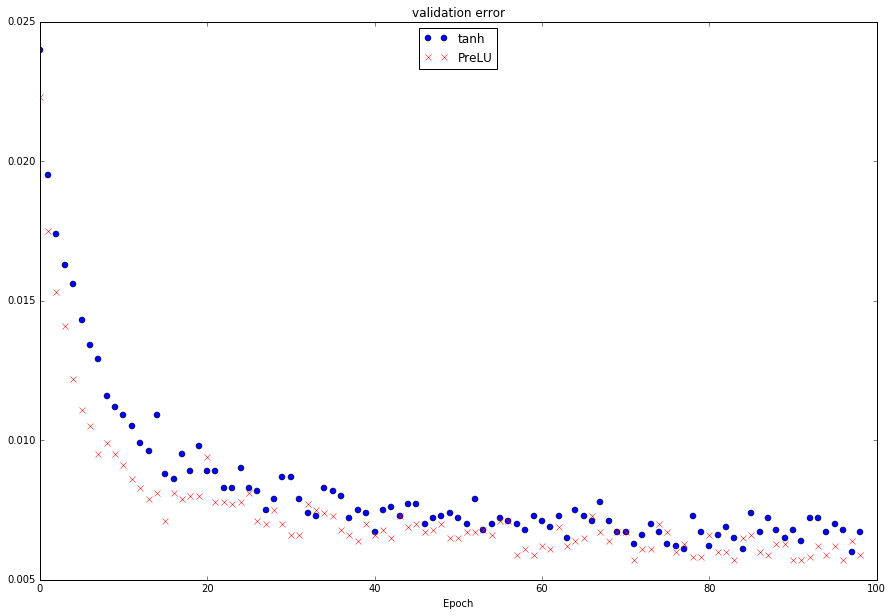

In [165]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.title('validation error')
plt.xlabel('Epoch')


plt.plot(lenet5tanh.val_error_history[1:],'bo',label='tanh')
plt.plot(lenet5prelu.val_error_history[1:], 'rx', label='PreLU')

plt.legend(loc='upper center')
plt.gcf().set_size_inches(15, 10)
plt.show() 

**Conclusion**: PreLU performs slightly better then tanh with a testing error of 0.55% vs 0.60% and a model that uses PreLU also seems to train faster.

In [167]:
trained_s = (lenet5, lenet5dropout, lenet5tanh, lenet5prelu)

In [ ]:
import pickle
